## Databricks Env

In [0]:
!pip install -r /Workspace/Users/daniel.tomes@databricks.com/client_demos/ci_cd/dbx_demo_cicd/requirements.txt

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

## Begin

In [1]:
import sys, os
from pyspark.sql.functions import col, lit
import pyspark.sql.functions as F
sys.path.append(os.path.abspath(".."))

In [2]:
from spark_env import spark

Driver is running on local environment


In [19]:
my_df = spark.table("main.tomes_gen.tmdb_movies_bronze")
pdf = (
    my_df
        # .filter("release_date >= '2020-01-01'")
        # .filter((col("popularity") >= 100) & (col("budget") >= 100000))
        .filter((col("budget") <= 500_000_000) & (col("budget") >= 50_000_000))
        .filter(col("vote_count") >= 1000)
        .filter(col("vote_average") >= 4)
        .select(col("title"), col("popularity"), col("budget"), col("vote_average"))
).toPandas()

In [18]:
pdf

,title,popularity,budget,vote_average
0,Meg 2: The Trench,8763.998,129000000.0,7.079
1,The Pope's Exorcist,5953.227,18000000.0,7.433
2,Transformers: Rise of the Beasts,5409.104,200000000.0,7.340
3,Ant-Man and the Wasp: Quantumania,4425.387,200000000.0,6.507
4,Creed III,3994.342,75000000.0,7.262
...,...,...,...,...
199,Maleficent: Mistress of Evil,101.739,185000000.0,7.345
200,Thor: Ragnarok,101.650,180000000.0,7.600
201,A Man Called Otto,101.353,50000000.0,7.885
202,The Avengers,100.800,220000000.0,7.710


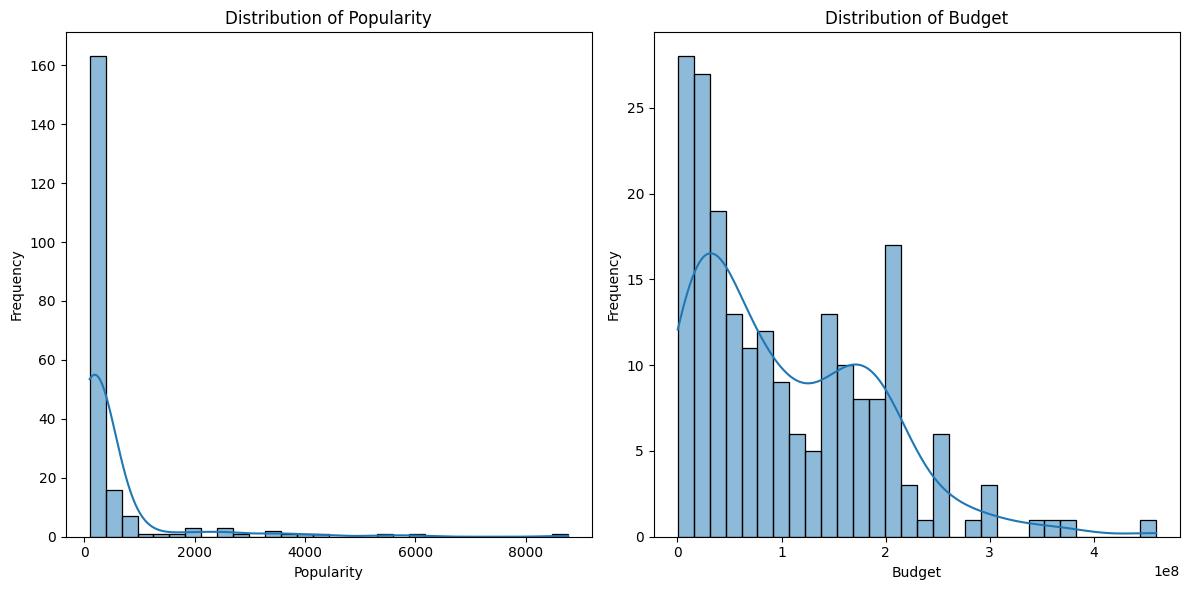

In [19]:
# Plot the distribution of the popularity column
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(pdf['popularity'], kde=True, bins=30)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Plot the distribution of the budget column
plt.subplot(1, 2, 2)
sns.histplot(pdf['budget'], kde=True, bins=30)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
import plotly.express as px

# Create a scatter plot to visualize the correlation between popularity and budget with tooltips
fig = px.scatter(pdf, x='popularity', y='budget', hover_data=['title'], title='Correlation between Popularity and Budget')
fig.update_layout(xaxis_title='Popularity', yaxis_title='Budget')
fig.show()


In [6]:
# Create a scatter plot to visualize the correlation between vote average and popularity with tooltips
fig = px.scatter(pdf, x='vote_average', y='popularity', hover_data=['title'], title='Correlation between Vote Average and Popularity')
fig.update_layout(xaxis_title='Vote Average', yaxis_title='Popularity')
fig.show()

In [20]:
# Create a scatter plot to visualize the correlation between vote average and budget with tooltips and a red trendline
fig = px.scatter(pdf, x='vote_average', y='budget', hover_data=['title'], title='Correlation between Vote Average and Budget', trendline='ols', trendline_color_override='red')
fig.update_layout(xaxis_title='Vote Average', yaxis_title='Budget')
fig.show()